# Final Report

Our Natural Language Processing work focusses on the Enron email data set which contains both spam and real emails for us to analyse. The research we wanted to perform was: *Analyse the Enron spam vs normal data set to create and visualise a topic model and understand the features of spam emails.* We did this by performing pre-processing on the data set, then creating a model and then analysing the resulting model.

Below is a summary of the results we have found through our research into NLP on the Enron email set. We summarise with the classification report for each model and a data frame containing the perplexity and coherence scores for each optimal model created. More results and visualisations of models can be found within our own folders and should definitely be looked at to understand the analysis that took place since the complexity of that cannot be shown through the results below.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import pickle

### Classifcation Reports

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

def classification_eval(y_true,y_pred):
    
    print("Confusion Matrix")
    C = confusion_matrix(y_true,y_pred)
    
    print('Classification report')
    print(classification_report(y_true, y_pred, target_names = ['Normal', 'Spam'], digits=3))

We import the predictions here. Note that we each have a different 'actual' list. These don't actually differ materially but are just reconfigured for our own data processing and therefore it was determined safest that we import the actual list for each person incase any processing inadvertently changed the ordering.

In [3]:
# Matt's predictions
Matt_actual = pickle.load(open('../Data/Actual.p','rb'))
Matt_pred = pickle.load(open('../Data/Matt_pred.p','rb'))

# Alex predictions
Alex_actual = pickle.load(open('../Data/Alex_y_actual.p','rb')) 
Alex_pred = pickle.load(open('../Data/Alex_y_pred.p','rb'))

# Xiao predictions
Xiao_actual = pickle.load(open('../Data/Xiao_actual.p','rb'))
Xiao_pred = pickle.load(open('../Data/Xiao_pred.p','rb'))

In [4]:
print('Below is the report for the LDA model prepared by Matt.')
print('-------------------------------------------------------')
classification_eval(Matt_actual,Matt_pred)

Below is the report for the LDA model prepared by Matt.
-------------------------------------------------------
Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      0.844     0.859     0.851     15046
        Spam      0.829     0.811     0.820     12670

    accuracy                          0.837     27716
   macro avg      0.836     0.835     0.835     27716
weighted avg      0.837     0.837     0.837     27716



In [5]:
print('Below is the report for the tf-idf LDA model prepared by Alex.')
print('--------------------------------------------------------------')
classification_eval(Alex_actual,Alex_pred)

Below is the report for the tf-idf LDA model prepared by Alex.
--------------------------------------------------------------
Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      0.654     0.798     0.719     15046
        Spam      0.676     0.499     0.574     12670

    accuracy                          0.661     27716
   macro avg      0.665     0.648     0.646     27716
weighted avg      0.664     0.661     0.653     27716



In [6]:
print('Below is the report for the NMF model prepared by Xiao.')
print('-------------------------------------------------------')
classification_eval(Xiao_actual,Xiao_pred)

Below is the report for the NMF model prepared by Xiao.
-------------------------------------------------------
Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      1.000     1.000     1.000     15046
        Spam      0.999     1.000     1.000     12670

    accuracy                          1.000     27716
   macro avg      1.000     1.000     1.000     27716
weighted avg      1.000     1.000     1.000     27716



In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def cal_APRF(pre,test):
    result = []
    ACC = round(100*(accuracy_score(pre, test)),3)
    result.append(ACC)
    # Precision
    P = round(100*(precision_score(pre, test, average="weighted")),3)
    result.append(P)
    # Recall 
    R = round(100*(recall_score(pre, test, average="weighted")),3)
    result.append(R)
    # F1-Score
    F = round(100*(f1_score(pre, test, average="weighted")),3)
    result.append(F)
    return result

score1 = cal_APRF(Matt_actual,Matt_pred)
score2 = cal_APRF(Alex_actual,Alex_pred)
score3 = cal_APRF(Xiao_actual,Xiao_pred)

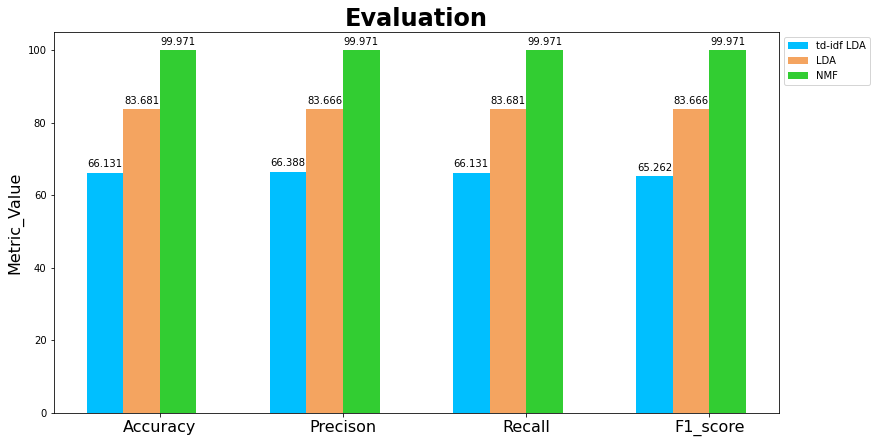

In [8]:
def draw_APRF(score1,score2,score3):
    plt.figure(figsize=(13,7))
    metric = ('Accuracy', 'Precison', 'Recall', 'F1_score', )
    bar_width = 0.2  
    index_nb = np.arange(len(metric))
    index_log = index_nb + bar_width  
    index_tree = index_log + bar_width  
    index_forest = index_tree + bar_width

    p1 = plt.bar(index_nb, height=score1, width=bar_width, color='deepskyblue',label='td-idf LDA')
    p2 = plt.bar(index_log, height=score2, width=bar_width, color='sandybrown',label='LDA')
    p3 = plt.bar(index_tree, height=score3, width=bar_width, color='limegreen',label='NMF')
    

    #Mark the value on the graph
    for p in p1:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p2:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p3:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")

    plt.legend(bbox_to_anchor=(1, 1))  
    plt.xticks(index_log + bar_width/2, metric, fontsize=16)  
    plt.ylabel('Metric_Value', fontsize=16)  
    plt.title('Evaluation', fontsize=24, fontweight= 'black')  
    plt.show()
    
draw_APRF(score2,score1,score3)

The above visualisation of the model scores is the result of Xiao (thank you) and is in my opinion very informative.

The first performance metric we consider is a classification of the documents into whether they are spam or not. One of the striking results we obtain from this is that the NMF model developed by Xiao is incredibly accurate with it's predictions. It ascertain's almost perfectly a division between the spam and normal emails which when first beginning this project, we did not think this was something we would even come close to. We see that the the LDA model without tf-idf applied to it performs well too, reporting an accuracy of 83.681 while when applying tf-idf to the model we lose 17% accuracy (a 21% drop) which was unexpected. One attribute which may impact this is the number of topics used in these models. There is more discussion on this below but the models used to classify in both LDA perspectives only used a 2 topic version whereas we maximise coherence with more topics than this and therefore classification using these may increase our accuracy in both cases.

### Perplexity and Coherence

We import our scores for our optimal models here and compare them.

In [9]:
Matt_values = pickle.load(open('../Data/Matt_opt_values.p','rb'))
Matt_values = ['LDA'] + Matt_values
Matt_values.pop(2)

Alex_values = pickle.load(open('../Data/Alex_optimal_values.p','rb'))
Alex_values.reverse()
Alex_values = ['td-idf LDA'] + Alex_values

Xiao_values = pickle.load(open('../Data/Xiao_opt_value.p','rb'))
Xiao_values = ['NMF','N/A',Xiao_values]

In [10]:
co_df = pd.DataFrame(columns=['Model','Perplexity','c_v coherence'])
co_df.loc[0] = Matt_values
co_df.loc[1] = Alex_values
co_df.loc[2] = Xiao_values # Xiao ended up using an NMF implementation for topic modelling and thus is unable to produce 
                            # perplexity/coherence scores for comparison to mine and Alex's models.

In [11]:
co_df

,Model,Perplexity,c_v coherence
0,LDA,-8.14924,0.561903
1,td-idf LDA,-21.4494,0.480509
2,NMF,N/A,0.356214


As our second performance metric, we consider the perplexity and c_v cohernece. We chose to only consider the c_v coherence since as referenced in Matt's work, the u_mass coherence despite being a fast computation is considered inaccurate compared to the c_v coherence. The first LDA model was run with as a 8 topic model, the tf-idf LDA model was run as a 44 topic model and the NMF model was run as a 15 topic model. We note first that the perplexity of the model with tf-idf applied to it is much better than the one without. This is very much in contrast to the results considered and we may assume that when finding the accurate amount of topics, we obtain a much better model than the one that can be produced without tf-idf. 

In comparison, when considering coherence, we again see a striking difference to the results obtained through classification. The LDA model without tf-idf has the best coherence of the 3 models considered and under this metric would thus be considered the best classifier.

These results may reflect the idea posed in the lectures; there are no methods to measure the accuracy of topic models that are consistent with human judgement. Depending on the metric relied on we may draw different conclusions.

### Comparison with removal of re/fw

In [12]:
Alex_rf_pred = pickle.load(open('../Data/y_pred_re.p','rb'))
Alex_rf_actual = pickle.load(open('../Data/y_actual_re.p','rb'))

In [13]:
classification_eval(Alex_rf_actual,Alex_rf_pred)

Confusion Matrix
Classification report
              precision    recall  f1-score   support

      Normal      0.830     0.800     0.815      4736
        Spam      0.325     0.371     0.346      1229

    accuracy                          0.711      5965
   macro avg      0.578     0.585     0.581      5965
weighted avg      0.726     0.711     0.718      5965



As a final aside, Alex produced a model that had the words re/fw removed from the emails. These terms in and of themselves we considered to be strong indicators of normal emails since most reply's or forward's would be to normal emails since most spam emails should not be replies or forwards but rather should be the originating email. Furthermore, the expectation was that people would not reply or forward on spam emails in most cases. We see from the results above that our identification of normal emails improved in this model and we were more accurate when recalling them but we also see a drop in precision when identifying spam emails.